# Generate training and prediction data from insitu and gridded datasets

More datasets are here! https://dap.tern.org.au/thredds/catalog/ecosystem_process/ozflux/catalog.html



## Load modules

In [ ]:
import sys
sys.path.append('/g/data/os22/chad_tmp/NEE_modelling/')
from collect_training_data_finescale import extract_ec_gridded_data

## Collect training data from EC towers, and gridded data at pixel location of EC tower

This data is used for training the models.


In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('/g/data/os22/chad_tmp/NEE_modelling/results/training_data/Calpe_training_data.csv', index_col='time', parse_dates=True)

<AxesSubplot:xlabel='time'>

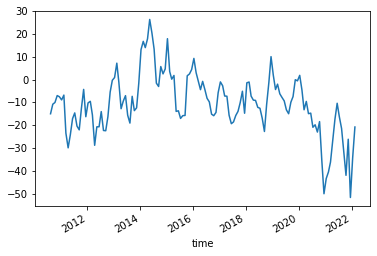

In [9]:
df.NEE_SOLO_EC.plot()

<AxesSubplot:xlabel='time'>

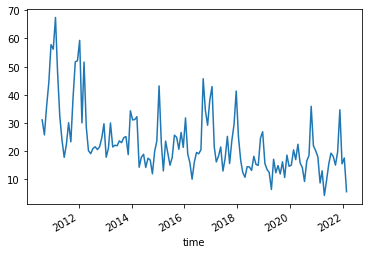

In [15]:
df.ER_SOLO_EC.plot()

<AxesSubplot:xlabel='time'>

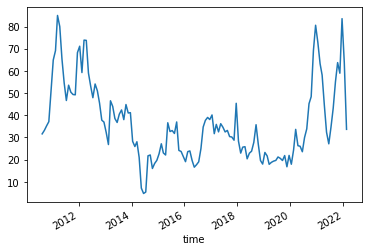

In [5]:
df.GPP_SOLO_EC.plot()

<AxesSubplot:xlabel='time'>

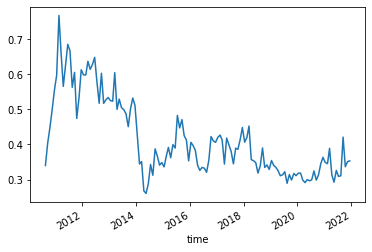

In [6]:
df.LAI_RS.plot()

<AxesSubplot:xlabel='time'>

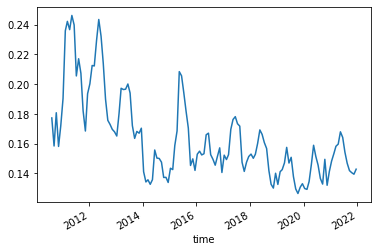

In [7]:
df.EVI_RS.plot()

<AxesSubplot:xlabel='time'>

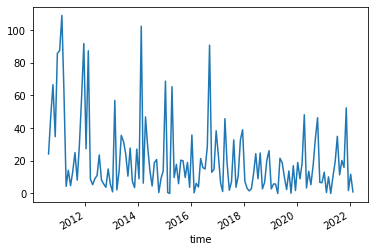

In [14]:
df.Precip_EC.plot()

<AxesSubplot:xlabel='time'>

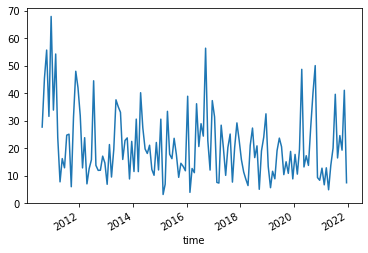

In [12]:
df.precip_RS.plot()

<AxesSubplot:xlabel='time'>

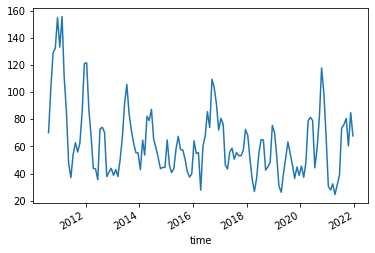

In [11]:
df.precip_cml_3_RS.plot()

<AxesSubplot:xlabel='time'>

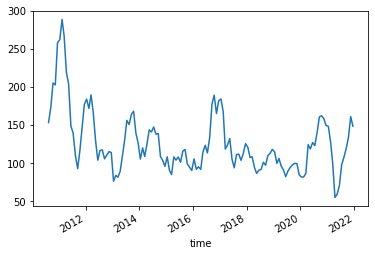

In [10]:
df.precip_cml_6_RS.plot()

In [ ]:
import xarray as xr
base = 'https://dap.tern.org.au/thredds/dodsC/ecosystem_process/ozflux/'
dp = xr.open_dataset(base+'DalyPasture/2022_v1/L6/default/DalyPasture_L6_20080101_20130908_Monthly.nc')
print('Daly Pasture: ', dp.latitude.values[0], dp.longitude.values[0])

sp =  xr.open_dataset(base+'SturtPlains/2021_v1/L6/default/SturtPlains_L6_20080828_20210724_Monthly.nc')
print('Sturt Plains: ', sp.latitude.values[0], sp.longitude.values[0])

du =  xr.open_dataset(base+'DalyUncleared/2022_v1/L6/default/DalyUncleared_L6_20080101_20220217_Monthly.nc')
print('Daly Uncleared: ', du.latitude.values[0], du.longitude.values[0])

In [ ]:
suffixes = [
    'Emerald/2022_v1/L6/default/Emerald_L6_20110610_20131231_Monthly.nc',
    'GreatWesternWoodlands/2022_v1/L6/default/GreatWesternWoodlands_L6_20130101_20220101_Monthly.nc',
    'CowBay/2022_v1/L6/default/CowBay_L6_20090101_20211231_Monthly.nc',
    'CumberlandPlain/2022_v1/L6/default/CumberlandPlain_L6_20140101_20220101_Monthly.nc',
    'Tumbarumba/2021_v1/L6/default/Tumbarumba_L6_20020107_20191231_Monthly.nc',
    'Whroo/2021_v1/L6/default/Whroo_L6_20111201_20210724_Monthly.nc',
    'WombatStateForest/2022_v1/L6/default/WombatStateForest_L6_20100120_20210529_Monthly.nc',
    'WallabyCreek/2022_v1/L6/default/WallabyCreek_L6_20050825_20130409_Monthly.nc',
    'RobsonCreek/2022_v1/L6/default/RobsonCreek_L6_20130801_20211218_Monthly.nc',
    'CapeTribulation/2022_v1/L6/default/CapeTribulation_L6_20100101_20181102_Monthly.nc',
    'AliceSpringsMulga/2022_v1/L6/default/AliceSpringsMulga_L6_20100903_20211231_Monthly.nc',
    'CalperumChowilla/2022_v1/L6/default/Calperum_L6_20100730_20220216_Monthly.nc',
    'DryRiver/2022_v1/L6/default/DryRiver_L6_20091025_20220218_Monthly.nc',
    'Litchfield/2021_v1/L6/default/Litchfield_L6_20150623_20210725_Monthly.nc',
    'SturtPlains/2021_v1/L6/default/SturtPlains_L6_20080828_20210724_Monthly.nc',
    'RiggsCreek/2022_v1/L6/default/RiggsCreek_L6_20110101_20170712_Monthly.nc', #dryland cropping
    'Otway/2021_v1/L6/default/Otway_L6_20070811_20110101_Monthly.nc', # pasture site
    'Yanco/2022_v1/L6/default/Yanco_L6_20130101_20220218_Monthly.nc', # soil site
    'DalyPasture/2022_v1/L6/default/DalyPasture_L6_20080101_20130908_Monthly.nc', #same 5km grid cell as Sturt CHECK THIS
    
    ## check the location of these ones below as they are new additions
    'Gingin/2022_v1/L6/default/Gingin_L6_20111013_20201231_Monthly.nc', # native Banksia woodland
    'LongreachMitchellGrassRangeland/2022_v1/L6/default/Longreach_L6_20181009_20210909_Monthly.nc',
    'Ridgefield/2022_v1/L6/default/Ridgefield_L6_20160101_20220218_Monthly.nc', #  dryland agriculture
    'SilverPlains/2022_v1/L6/default/SilverPlains_L6_20200101_20211231_Monthly.nc', #Australian Mountain Reseach 
    'DalyUncleared/2022_v1/L6/default/DalyUncleared_L6_20080101_20220217_Monthly.nc', #Woodland savanna
    'Collie/2022_v1/L6/default/Collie_L6_20170804_20191111_Monthly.nc', # wandoo woodland
    'AdelaideRiver/2022_v1/L6/default/AdelaideRiver_L6_20071017_20090524_Monthly.nc', #  Savanna dominated by Eucalyptus
    'Warra/2022_v1/L6/default/Warra_L6_20130305_20210923_Monthly.nc', #tasmania
    
    'SamfordEcologicalResearchFacility/2022_v1/L6/default/Samford_L6_20100602_20171231_Monthly.nc', #fragmented landscape 5km resolution not good enough
    'Boyagin/2022_v1/L6/default/Boyagin_L6_20171020_20211231_Monthly.nc', #Same grid cell as Rigdeland, in remnant forest
    
    #'TiTreeEast/2022_v1/L6/default/TiTreeEast_L6_20120718_20220117_Monthly.nc', # on same grid cell as Alice Springs
    
    # 'FoggDam/2021_v1/L6/default/FoggDam_L6_20060207_20081031_Monthly.nc', # wetland that floods seasonally
    # 'Loxton/2022_v1/L6/default/Loxton_L6_20080819_20090609_Monthly.nc' # almond tress, 1 year of data
    #'RedDirtMelonFarm/2021_v1/L6/default/RedDirtMelonFarm_L6_20110923_20130721_Monthly.nc', #savannah converted to melons
        # removing Red dirt because its a small farm in the middle of svannah woodland so LC is wrong at LC scale (5km resolution)
]

i=0
sites = []
for suffix in suffixes:
    print(" {:02}/{:02}\r".format(i + 1, len(suffixes)), end="")
    xx = extract_ec_gridded_data(suffix)
    sites.append(xx)
    i+=1
    

## Collate gridded data for predictions

This data is used to predict on, results of this are stored here `/g/data/os22/chad_tmp/NEE_modelling/results/predicton_data/prediction_data_YYYY.nc`

In [ ]:
import sys
sys.path.append('/g/data/os22/chad_tmp/NEE_modelling/')
from collect_prediction_data import collect_prediction_data

In [ ]:
t1, t2='2003','2021'

In [ ]:
ds = collect_prediction_data(time_start=t1, time_end=t2, verbose=True)
ds